In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
PATH_20 = "data/rezultati_2020/Excel/" #+ "02_01.xlsx"
PATH_16 = "data/rezultati_2016/Excel/" #+ "001_00.xlsx"
PATH_15 = "data/rezultati_2015/Excel/" #+ "02_01.xlsx"
PATH_11 = "data/rezultati_2011/Excel/" #+ "01_I_izborna_jedinica.xlsx"

In [5]:
def get_data_ii(i):
    if i < 10:
        i = "0" + str(i)
    data_20 = pd.DataFrame(pd.read_excel(PATH_20 + "02_"+str(i)+".xlsx")) 
    data_16 = pd.DataFrame(pd.read_excel(PATH_16 + "/0"+str(i)+"_00.xlsx"))
    data_15 = pd.DataFrame(pd.read_excel(PATH_15 + "02_"+str(i)+".xlsx"))
    data_11 = pd.DataFrame(pd.read_excel(PATH_11 + ""+str(i)+"_izborna_jedinica.xlsx"))
    return data_20, data_16, data_15, data_11

In [6]:
def get_all_data():
    dataframes_20 = []
    dataframes_16 = []
    dataframes_15 = []
    dataframes_11 = []

    for i in tqdm(range (1,11)):
        data_20, data_16, data_15, data_11 = get_data_ii(i)
        #remove first row and last 3 rows
        data_11 = data_11.iloc[1:-3]

        data_20 = data_20.filter(regex="Rbr BM|Naziv BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST|DOMOVINSKI POKRET|MOŽEMO", axis=1)
        data_16 = data_16.filter(regex="Rbr BM|Naziv BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
        data_15 = data_15.filter(regex="Rbr BM|Naziv BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
        data_11 = data_11.filter(regex="BM Rbr|BM Naziv|Glasovalo ukupno|SDP|HDZ", axis=1)

        data_20.columns = ["Rbr BM", "Naziv BM" ,"Glasovalo ukupno","MOST", "MOŽEMO", "DP", "HDZ", "SDP"]
        data_16.columns = ["Rbr BM", "Naziv BM" ,"Glasovalo ukupno","MOST", "HDZ", "SDP"]
        data_15.columns = ["Rbr BM", "Naziv BM" ,"Glasovalo ukupno","HDZ", "MOST", "SDP"]
        data_11.columns = ["Rbr BM", "Naziv BM" ,"Glasovalo ukupno","HDZ", "SDP"]

        for df in [data_20, data_16, data_15, data_11]:
            df["BM"] = df["Rbr BM"].astype(int).astype(str) + " " + df["Naziv BM"]
            df.drop("Naziv BM", axis=1, inplace=True)
            df.drop("Rbr BM", axis=1, inplace=True)

        dataframes_20.append(data_20)
        dataframes_16.append(data_16)
        dataframes_15.append(data_15)
        dataframes_11.append(data_11)

    data_20 = pd.concat(dataframes_20)
    data_16 = pd.concat(dataframes_16)
    data_15 = pd.concat(dataframes_15)
    data_11 = pd.concat(dataframes_11)
    return data_20, data_16, data_15, data_11

        

<>:12: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\('
<>:12: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\('
C:\Users\Ana\AppData\Local\Temp\ipykernel_20160\1633688425.py:12: SyntaxWarning: invalid escape sequence '\('
  data_20 = data_20.filter(regex="Rbr BM|Naziv BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST|DOMOVINSKI POKRET|MOŽEMO", axis=1)
C:\Users\Ana\AppData\Local\Temp\ipykernel_20160\1633688425.py:13: SyntaxWarning: invalid escape sequence '\('
  data_16 = data_16.filter(regex="Rbr BM|Naziv BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
C:\Users\Ana\AppData\Local\Temp\ipykernel_20160\1633688425.py:14: SyntaxWarning: invalid escape sequence '\('
  data_15 = data_15.filter(regex="Rbr BM|Naziv BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)


In [7]:
data_20, data_16, data_15, data_11 = get_all_data()

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [04:16<00:00, 25.61s/it]


In [8]:
data_20

,Glasovalo ukupno,MOST,MOŽEMO,DP,HDZ,SDP,BM
0,542,31,143,52,199,77,1 ANDRIJA MEDULIĆ
1,540,39,152,56,124,116,2 ANDRIJA MEDULIĆ
2,570,55,150,42,138,130,3 AUGUST ŠENOA
3,610,39,154,59,156,139,4 AUGUST ŠENOA
4,513,34,162,18,126,125,5 CVJETNI TRG
...,...,...,...,...,...,...,...
636,693,91,26,95,341,81,3 PETRAČA
637,754,96,24,73,414,95,4 ČIBAČA
638,736,103,49,83,329,110,5 SREBRENO
639,283,33,20,32,133,40,6 PLAT


Text(0.5, 1.0, 'Distribution of number of votes per BM in 2015, 2016 and 2020')

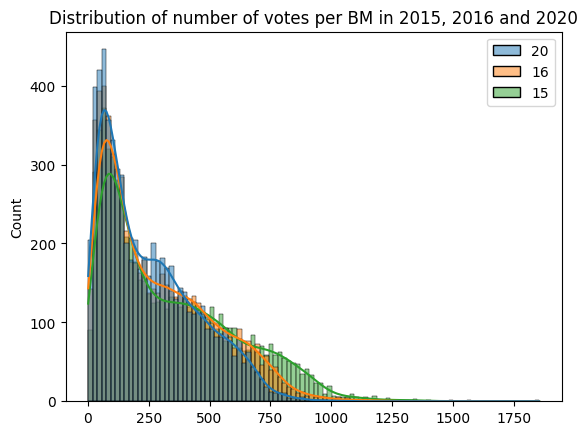

In [9]:
all_data = {"20": data_20["Glasovalo ukupno"].values,"16":data_16["Glasovalo ukupno"].values,"15":data_15["Glasovalo ukupno"].values}
sns.histplot(all_data, kde=True, bins=100)
plt.title("Distribution of number of votes per BM in 2015, 2016 and 2020")

In [10]:
#calculate variance of each row across all dataframes
def calculate_variance(dataframes, column_names):
    variance_dict = {}
    big_dict = {}

    #iterate for each stranka
    for stranka in column_names:
        variance_dict[stranka] = {}
        big_dict[stranka] = {}
        
        #iterate over all rows aka biracka mjesta
        for i in tqdm(range(len(dataframes[0]))):
            row_votes = []
            row_percentages = []
            big_dict_votes = []

            #iterate for each year
            for j in range(len(dataframes)):
                #we use the same bm for all dataframes and use 2020 as reference
                bm = dataframes[0]["BM"].iloc[i]
                #some biracka mjesta are missing in some years
                try:
                    #for that year dataframe[j] we find the same bm as the reference
                    entry_of_interest = dataframes[j].loc[dataframes[j]['BM'] == bm]

                    #absolute number of votes for that stranka
                    votes = int(entry_of_interest[stranka].values[0])
                    #calculate percentage of votes for that stranka
                    value = (votes / int(entry_of_interest["Glasovalo ukupno"].values[0]))*100

                    row_votes.append(votes)
                    row_percentages.append(value)
                    big_dict_votes.append(str(votes) + "/" + str(entry_of_interest["Glasovalo ukupno"].values[0]))
                except:
                    pass
            
            #if the bm was present for all years
            if len(row_percentages) == len(dataframes):
            #if we decide to include 2011
            #if len(row_percentages) == len(dataframes) or (stranka=="MOST" and len(row_percentages) == len(dataframes)-1): 
                 
                #find max difference between elements in row
                diff = max(row_votes) - min(row_votes)
                #find max difference in percentages
                diff_percent = max(row_percentages) - min(row_percentages)

                #if all row_votes 0, we skip
                if row_votes == [0,0,0]:
                    # print(stranka, dataframes[0]["BM"].iloc[i], big_dict_votes)
                    continue
                
                variance_dict[stranka][dataframes[0]["BM"].iloc[i]] = [diff, diff_percent, np.var(row_percentages), np.std(row_percentages)]
                big_dict[stranka][dataframes[0]["BM"].iloc[i]] = big_dict_votes


    return big_dict, variance_dict

In [11]:
column_names = ["HDZ", "SDP", "MOST"]
dataframes = [data_20, data_16, data_15]
big_dict, variance_dict = calculate_variance(dataframes, column_names)    

100%|██████████| 6558/6558 [01:33<00:00, 70.06it/s] 


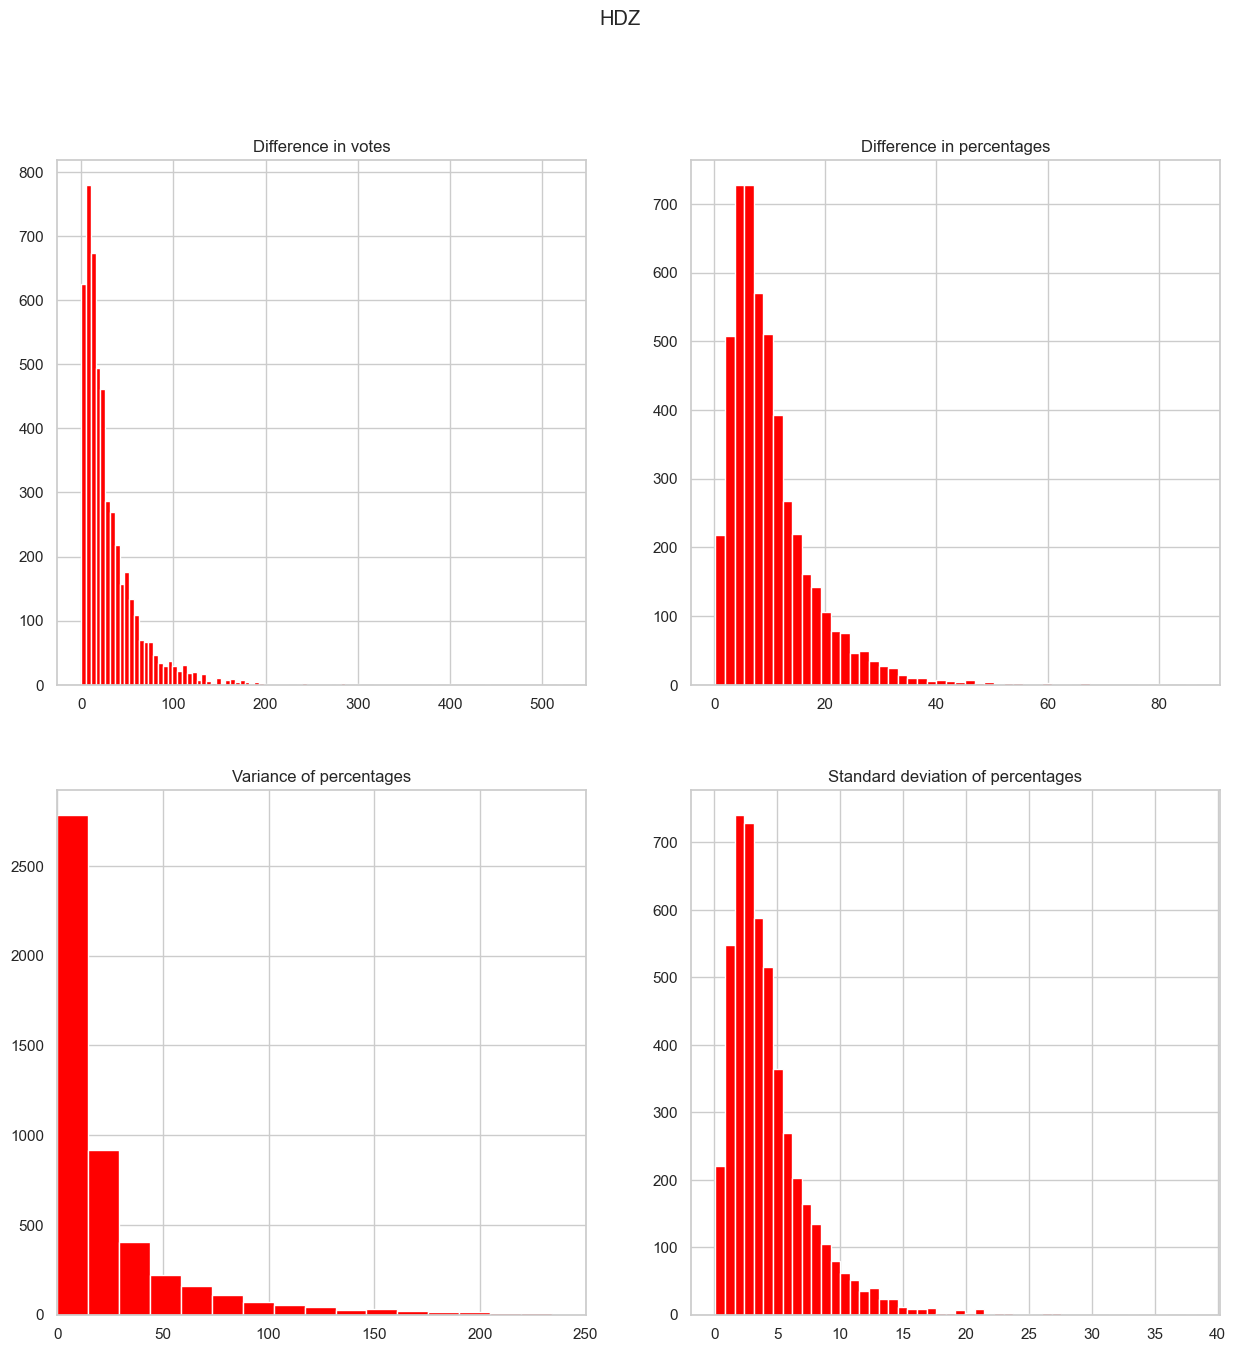

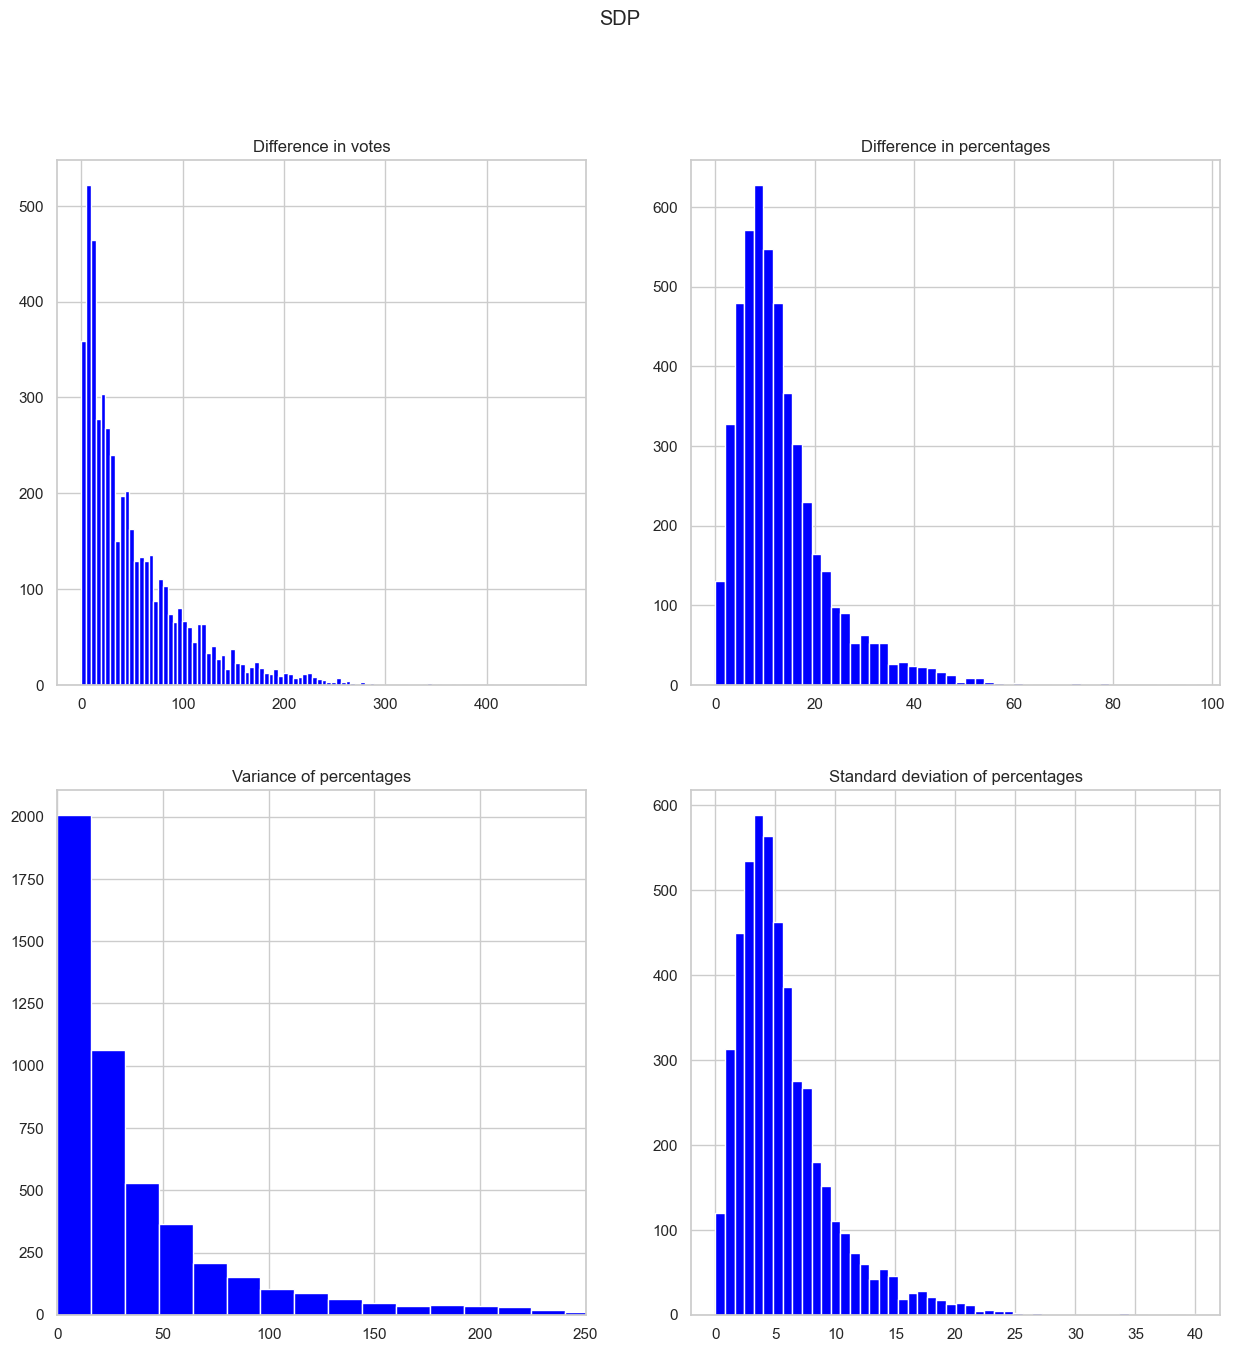

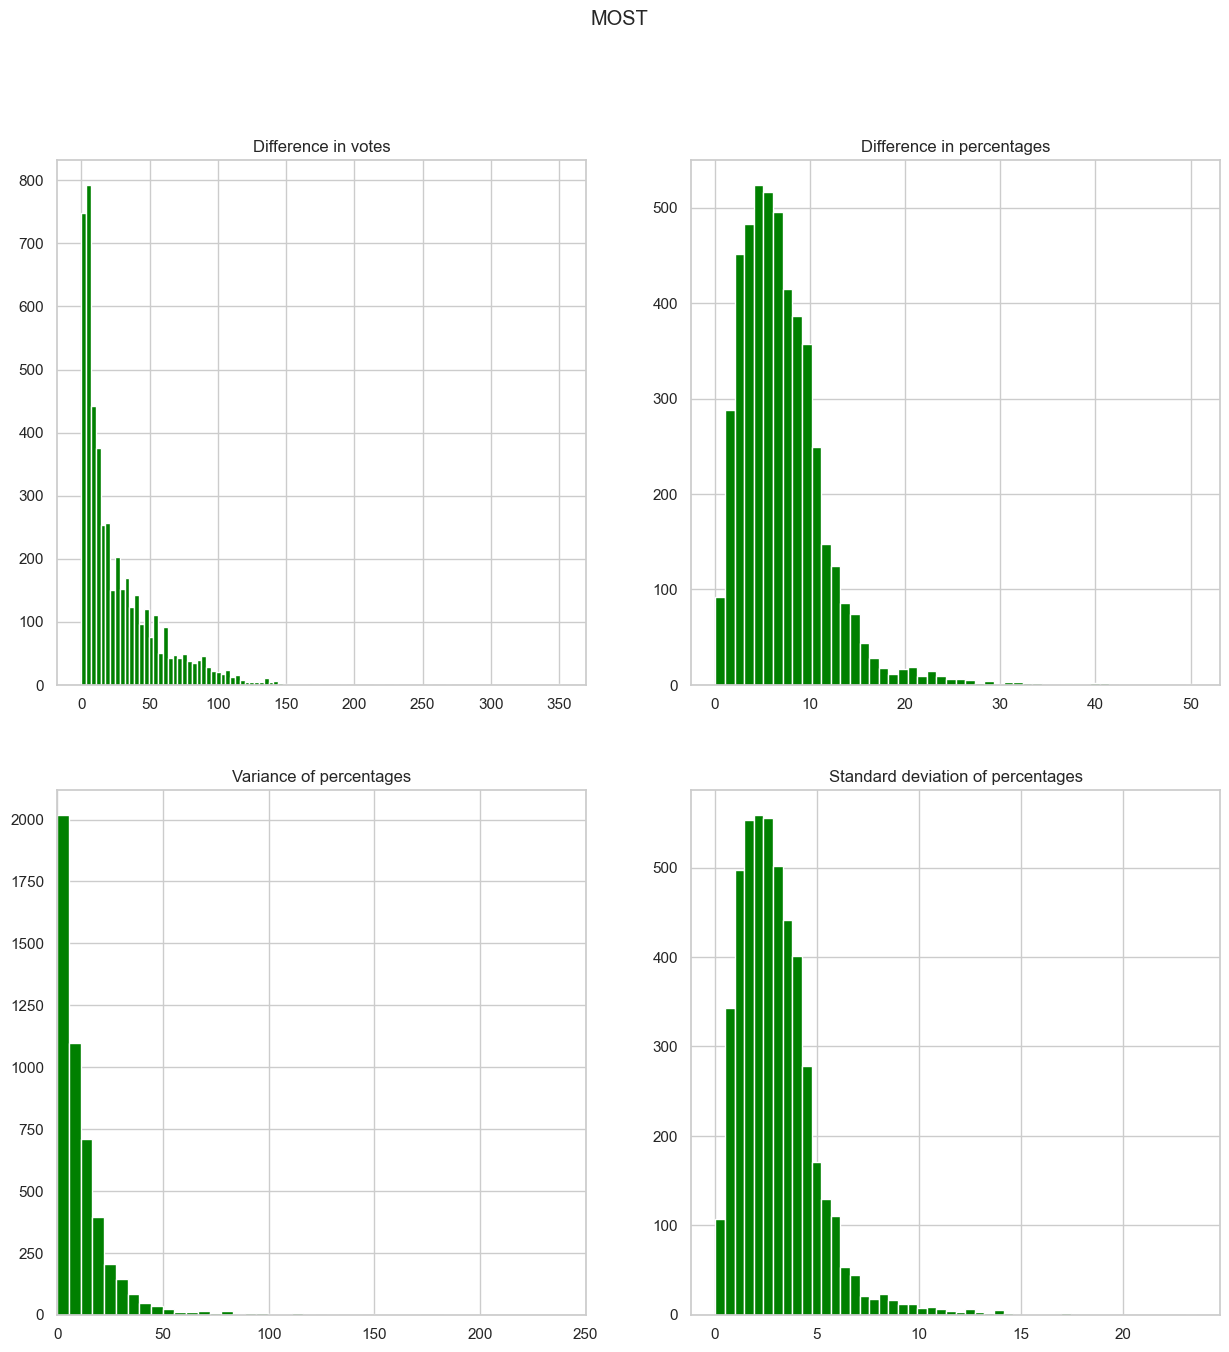

In [12]:
sns.set(style="whitegrid")

colors= {"HDZ": "red", "SDP": "blue", "MOST": "green"}
def plot_hist(big_dict, variance_dict, stranka):
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle(stranka)
    axs[0, 0].hist([x[0] for x in variance_dict[stranka].values()], bins=100, color= colors[stranka])
    axs[0, 0].set_title("Difference in votes")
    axs[0, 1].hist([x[1] for x in variance_dict[stranka].values()], bins=50, color= colors[stranka])
    axs[0, 1].set_title("Difference in percentages")
    axs[1, 0].set_xlim(0, 250)
    axs[1, 0].hist([x[2] for x in variance_dict[stranka].values()], bins=100, color= colors[stranka])
    axs[1, 0].set_title("Variance of percentages")
    axs[1, 1].hist([x[3] for x in variance_dict[stranka].values()], bins=50, color= colors[stranka])
    axs[1, 1].set_title("Standard deviation of percentages")
    plt.show()

for stranka in column_names:
    plot_hist(big_dict, variance_dict, stranka)
    

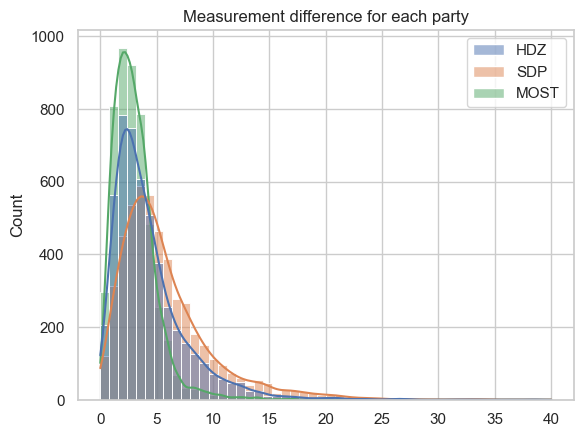

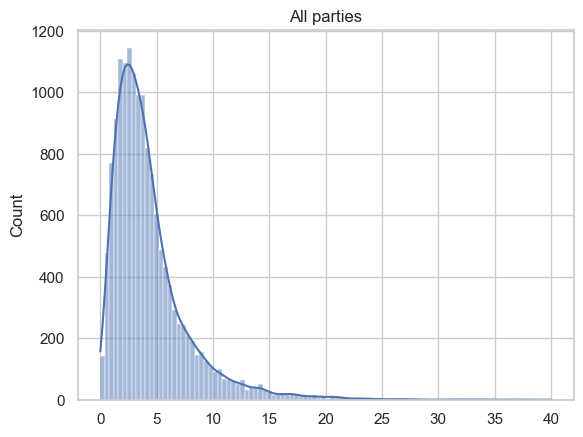

In [13]:
#visualize the distribution of variance
def plot_variance(variance_dict, column_names):
    new_values = {}
    for stranka in column_names:
        values = list(variance_dict[stranka].values())
        new_values[stranka] = [value[3] for value in values]
        
    sns.histplot(new_values, kde=True, bins=50, color=colors.get(stranka, 'black'), label=stranka)
    plt.title("Measurement difference for each party")
    plt.show()

    sns.histplot([item for sublist in new_values.values() for item in sublist], kde=True, bins=100)
    plt.title("All parties")
    plt.show()

plot_variance(variance_dict, column_names)



-------

### Biračka mjesta koja imaju minimalne promjene kroz godine za:
- value_type = 0: razlika u apsolutnoj vrijednosti u broju glasova
- value_type = 1: razlika u postotku glasova
- value_type = 2: varijanca postotka glasova
- value_type = 3: standardna devijacija postotka glasova

In [14]:
def get_least_volatile(variance_dict, big_dict, value_type=1):

    # Sort items in variance_dict based on the fourth element in the tuple
    items_variance = list(variance_dict.items())
    items_variance.sort(key=lambda x: x[1][value_type])

    print("Least volatile:")
    bms = []
    for value in items_variance:
        # kroz godine promjena manja od 2%
        if value[1][value_type] < 2:
            print(f"{value[0]}: Measure value = {value[1][value_type]}, Votes over years: {big_dict[value[0]]}")
            bms.append(value[0])
    
    print("\nBroj BM koji imaju male promjene: "+ str(len(bms)))
    return bms

In [15]:
print("HDZ")
bms_hdz_not11=get_least_volatile(variance_dict["HDZ"], big_dict["HDZ"],1)

HDZ
Least volatile:
7 VINKOVCI: Measure value = 0.17595720720720465, Votes over years: ['95/222', '110/256', '135/315']
3 GORNJA DUBRAVA: Measure value = 0.24154589371980606, Votes over years: ['9/81', '10/92', '11/101']
4 DOLIĆA DRAGA: Measure value = 0.24424105306458443, Votes over years: ['138/176', '147/187', '163/208']
1 CERNA: Measure value = 0.26235846451257316, Votes over years: ['191/426', '213/474', '276/612']
2 NARTA: Measure value = 0.26933004152171236, Votes over years: ['48/134', '48/133', '58/161']
1 SRAČINEC: Measure value = 0.3034215966033784, Votes over years: ['59/421', '64/447', '77/541']
3 DAUTAN: Measure value = 0.3065134099616813, Votes over years: ['47/106', '52/117', '64/145']
3 DRAGUĆ: Measure value = 0.31266284523189114, Votes over years: ['4/76', '5/101', '5/99']
3 KRIŽOVLJAN: Measure value = 0.3296703296703285, Votes over years: ['23/65', '35/98', '45/126']
11 VINKOVCI: Measure value = 0.3367402032755251, Votes over years: ['173/386', '204/453', '247/547']


In [16]:
print("SDP")
bms_sdp_not11=get_least_volatile(variance_dict["SDP"], big_dict["SDP"],1)

SDP
Least volatile:
63 BIRAČKO MJESTO 63: Measure value = 0.0, Votes over years: ['2/10', '4/20', '4/20']
33 SISAK: Measure value = 0.13351393188855099, Votes over years: ['38/85', '211/472', '271/608']
17 KUČIĆE: Measure value = 0.1388888888888884, Votes over years: ['10/288', '12/333', '13/360']
2 DAVOR: Measure value = 0.18918165974512036, Votes over years: ['62/383', '66/403', '74/457']
7 SVIBIĆ: Measure value = 0.2360203340595497, Votes over years: ['1/68', '1/77', '1/81']
9 PETRINJA: Measure value = 0.30913738778907884, Votes over years: ['100/308', '122/378', '145/445']
10 KATUNI PRPUŠA: Measure value = 0.332739156268568, Votes over years: ['2/85', '2/92', '2/99']
6 PLOČE: Measure value = 0.42240466101694807, Votes over years: ['174/512', '203/590', '231/676']
9 AUGUŠTANOVEC: Measure value = 0.432900432900432, Votes over years: ['14/57', '16/66', '19/77']
8 JURDANI: Measure value = 0.4577508350859887, Votes over years: ['104/236', '122/274', '141/319']
7 VALPOVO: Measure value =

In [17]:
print("MOST")
bms_most_not11=get_least_volatile(variance_dict["MOST"], big_dict["MOST"],1)

MOST
Least volatile:
31 SISAK: Measure value = 0.09302325581395277, Votes over years: ['16/300', '21/387', '26/483']
3 GARDINOVEC: Measure value = 0.1064988213332696, Votes over years: ['10/332', '12/386', '13/433']
15 SIROVA KATALENA: Measure value = 0.20468364336885203, Votes over years: ['1/113', '1/135', '1/147']
5 ĐURĐENOVAC: Measure value = 0.24291977722478997, Votes over years: ['10/262', '11/291', '14/348']
9 RUJEVAC: Measure value = 0.27580772261623343, Votes over years: ['1/47', '1/54', '1/53']
11 VATROGASNI DOM: Measure value = 0.2777777777777777, Votes over years: ['1/36', '1/40', '1/40']
35 SLANA: Measure value = 0.32894736842105265, Votes over years: ['3/112', '3/110', '4/133']
9 BOKŠIĆ: Measure value = 0.34013605442176864, Votes over years: ['3/141', '4/168', '4/196']
16 VRH: Measure value = 0.3404139433551201, Votes over years: ['8/205', '9/243', '11/272']
1 MAJKOVI: Measure value = 0.3635161929940516, Votes over years: ['15/74', '18/89', '14/68']
6 VLAŠIĆI: Measure val

In [19]:
from geopy.geocoders import Nominatim
import folium
import time

geolocator = Nominatim(user_agent="geoapiExercises")

cleaned_names = {}
cleaned_names["HDZ"]=[re.sub(r'\s+\d+$', '', name) for name in bms_hdz_not11]
cleaned_names["SDP"] = [re.sub(r'\s+\d+$', '', name) for name in bms_sdp_not11]
#cleaned_names["MOST"] = [re.sub(r'\s+\d+$', '', name) for name in bms_most_not11]

# This will hold the place names and their coordinates
places_with_coordinates = []

for stranka in ["HDZ", "SDP"]:
    for place in tqdm(cleaned_names[stranka]):
        try:
            location = geolocator.geocode(place + ", Croatia")
            if location:
                places_with_coordinates.append((place, location.latitude, location.longitude, stranka))
            time.sleep(1)  # To avoid hitting rate limits
        except Exception as e:
            print(f"Error occurred for {place}: {e}")

# Now, we can plot these on a map
map = folium.Map(location=[44.28 , 16.26], zoom_start=7)

for name, lat, lon, stranka in places_with_coordinates:
    folium.Marker(location=[lat, lon], popup=name, icon=folium.Icon(color=colors[stranka])).add_to(map)

map


 10%|█         | 23/229 [00:31<06:25,  1.87s/it]

Error occurred for 1 REKA: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=1+REKA%2C+Croatia&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


100%|██████████| 141/141 [02:56<00:00,  1.25s/it]
